# Dados Brutos

In [5]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
pd.set_option('display.max_columns', None)

def extract_text_between_quotes(string):
    pattern = r"'(.*?)'"
    matches = re.findall(pattern, string)
    return matches

In [7]:
dados = pd.read_csv('State_of_data_2022.csv')

Perguntas possíveis:

Dados Gerais
- idade
- gênero
- ensino / formação acadêmica

Carreira
- modo de trabalho (remoto, presencial, híbrido)

Satisfação (opcional)
- satisfação / insatisfação
- motivos da insatisfação (gráfico comparativo barras)

Densidade geográfica
- Densidade de profissionais por estado
- Densidade de profissionais por gênero
- Densidade de profissionais por raça
- Densidade de profissionais pcd

Salário
- geral
- por cargo
- por tempo de carreira
- por gênero
- pcd
- por raça

Fontes de dados utilizados no trabalho

Tecnologias utilizadas
- linguagens no geral
- 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?' -> P4_e
- P4_g -> opções de cloud
- na área de ciência, engenharia e analista (tecnologias por nicho)

- procurar insights com a parte de ciência de dados - P8


obs: sobre os NaN, considerar apenas as pessoas que responderam

# Explicação do DataSet

~ explicação do kaggle

# Filtrando dados

In [8]:
# Removendo o ID
dados = dados.drop("('P0', 'id')", axis = 1)

In [9]:
# Separando por partes
parte_1 = dados.filter(like = 'P1', axis = 1)
parte_2 = dados.filter(like = 'P2', axis = 1)
parte_3 = dados.filter(like = 'P3', axis = 1)
parte_4 = dados.filter(like = 'P4', axis = 1)
parte_5 = dados.filter(like = 'P5', axis = 1)
parte_6 = dados.filter(like = 'P6', axis = 1)
parte_7 = dados.filter(like = 'P7', axis = 1)
parte_8 = dados.filter(like = 'P8', axis = 1)

In [10]:
for i in parte_4.columns:
    parte_4.rename(columns={i:extract_text_between_quotes(i)[0]},inplace=True)

parte_4.columns

C:\Users\INTEL\AppData\Local\Temp\ipykernel_8420\3561749937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parte_4.rename(columns={i:extract_text_between_quotes(i)[0]},inplace=True)


Index(['P4_a ', 'P4_a_1 ', 'P4_b ', 'P4_b_1 ', 'P4_b_2 ', 'P4_b_3 ', 'P4_b_4 ',
       'P4_b_5 ', 'P4_b_6 ', 'P4_b_7 ', 'P4_b_8 ', 'P4_c ', 'P4_c_1 ',
       'P4_c_2 ', 'P4_c_3 ', 'P4_c_4 ', 'P4_c_5 ', 'P4_c_6 ', 'P4_c_7 ',
       'P4_c_8 ', 'P4_d ', 'P4_d_1 ', 'P4_d_2 ', 'P4_d_3 ', 'P4_d_4 ',
       'P4_d_5 ', 'P4_d_6 ', 'P4_d_7 ', 'P4_d_8 ', 'P4_d_9 ', 'P4_d_10 ',
       'P4_d_11 ', 'P4_d_12 ', 'P4_d_13 ', 'P4_d_14 ', 'P4_e ', 'P4_f ',
       'P4_g ', 'P4_g_1 ', 'P4_g_2 ', 'P4_g_3 ', 'P4_f_4 ', 'P4_f_5 ',
       'P4_f_6 ', 'P4_f_7 ', 'P4_f_8 ', 'P4_f_9 ', 'P4_f_10 ', 'P4_f_11 ',
       'P4_f_12 ', 'P4_f_13 ', 'P4_f_14 ', 'P4_f_15 ', 'P4_f_16 ', 'P4_f_17 ',
       'P4_f_18 ', 'P4_f_19 ', 'P4_f_20 ', 'P4_f_21 ', 'P4_f_22 ', 'P4_f_23 ',
       'P4_f_24 ', 'P4_f_25 ', 'P4_f_26 ', 'P4_f_27 ', 'P4_f_28 ', 'P4_f_29 ',
       'P4_f_30 ', 'P4_f_31 ', 'P4_f_32 ', 'P4_f_33 ', 'P4_g ', 'P4_h ',
       'P4_h_1 ', 'P4_h_2 ', 'P4_h_3 ', 'P4_i ', 'P4_i_1 ', 'P4_i_2 ',
       'P4_i_3 ', 'P4_i_4 ', 'P

C:\Users\INTEL\AppData\Local\Temp\ipykernel_8420\2405731247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P4_a['contador'] = 1
C:\Users\INTEL\AppData\Local\Temp\ipykernel_8420\2405731247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P4_a['P4_a '] = df_P4_a['P4_a '].str.split(':',expand=True)[0]


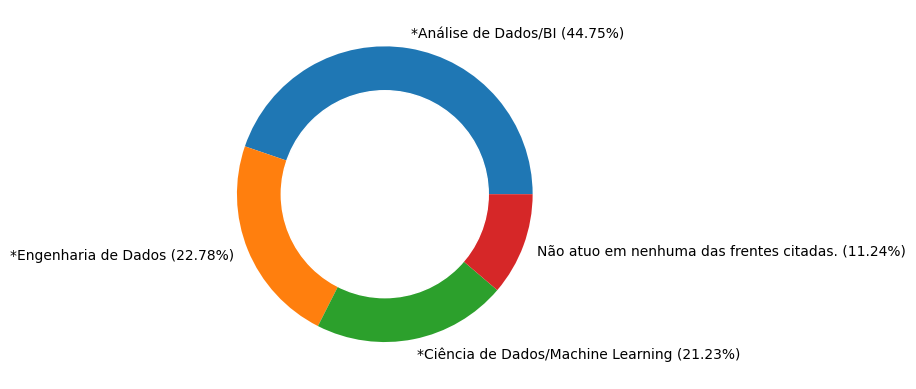

In [11]:
#Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
df_P4_a = parte_4.filter(like='P4_a ',axis=1)
df_P4_a['contador'] = 1
df_P4_a['P4_a '] = df_P4_a['P4_a '].str.split(':',expand=True)[0]

df_P4_a = df_P4_a.groupby('P4_a ',as_index=False).agg({'contador':'sum'}).sort_values(by='contador',ascending=False)

df_P4_a['percentual'] = (df_P4_a['contador'] / df_P4_a['contador'].sum()) * 100

#Paliativo para os labels

df_P4_a['label'] = df_P4_a['P4_a '] + ' (' +  df_P4_a['percentual'].round(2).astype('str') + '%' + ')'


#Donut Chart
plt_centro = plt.Circle((0,0), 0.7,color='white')
plt.pie(df_P4_a['percentual'],labels=df_P4_a['label'])
p = plt.gcf()
p.gca().add_artist(plt_centro)

plt.show()



C:\Users\INTEL\AppData\Local\Temp\ipykernel_8420\1398858750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P4_e['contador'] = 1 #Define uma nova coluna somente o número 1


Text(0, 0.5, 'Linguagem')

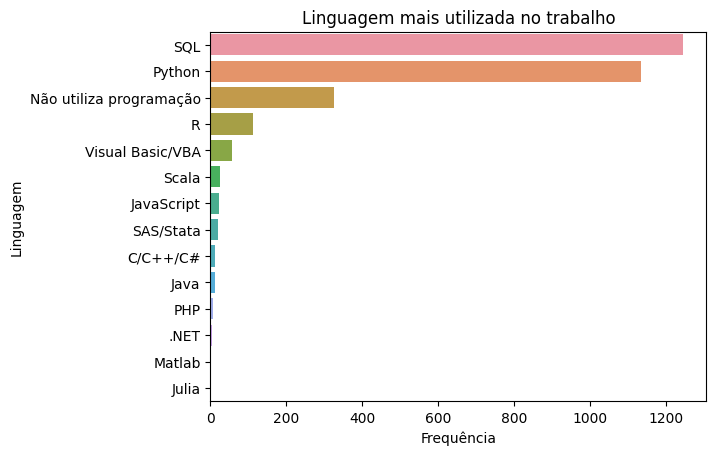

In [12]:
#Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?
df_P4_e = parte_4.filter(like='P4_e ',axis=1) #Pega somente a coluna de nome 'P4_e'
df_P4_e['contador'] = 1 #Define uma nova coluna somente o número 1 

#Agrupamento para gerar o ranking das linguagens mais utilizadas
df_P4_e = df_P4_e.groupby('P4_e ',as_index=False).agg({'contador':'sum'}).sort_values(by='contador',ascending=False)

#Gráfico de barra com o ranking por linguagem
sns.barplot(df_P4_e,y='P4_e ',x='contador')
plt.title('Linguagem mais utilizada no trabalho')
plt.xlabel('Frequência')
plt.ylabel('Linguagem')



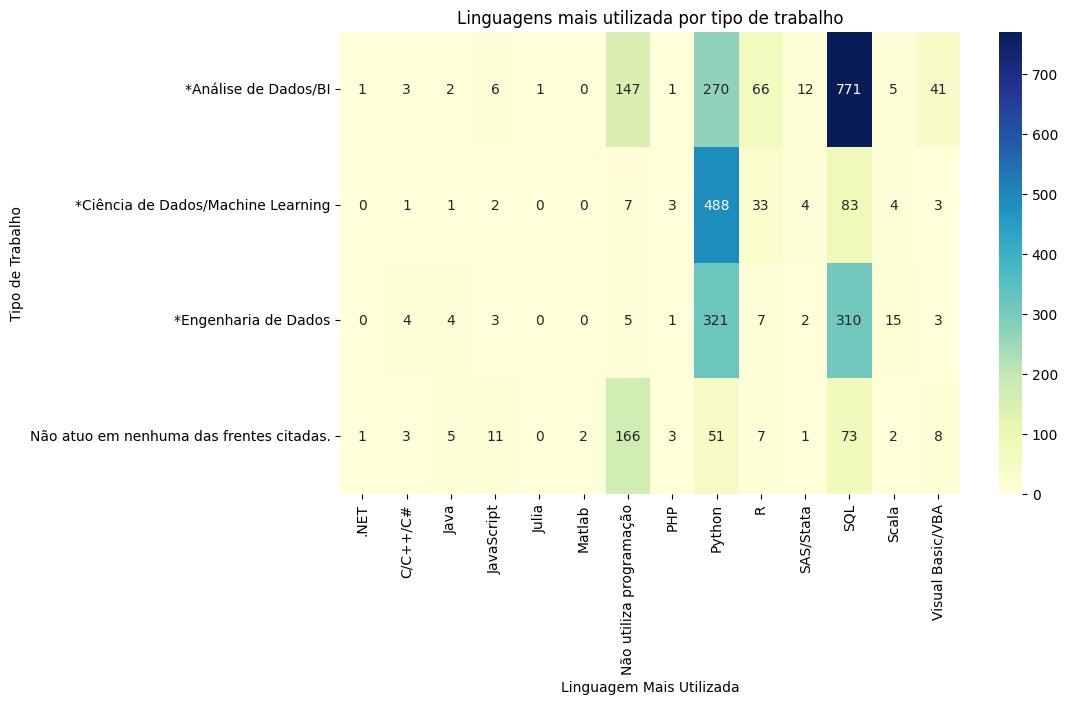

In [13]:
df_P4_e_pivot = parte_4[['P4_a ','P4_e ']]
df_P4_e_pivot = df_P4_e_pivot.dropna()
df_P4_e_pivot['P4_a '] = parte_4['P4_a '].str.split(':',expand=True)[0]
df_P4_e_pivot = df_P4_e_pivot.pivot_table(index='P4_a ',columns='P4_e ',aggfunc='size', fill_value=0)
df_P4_e_pivot

plt.figure(figsize=(10, 6))
sns.heatmap(df_P4_e_pivot, cmap='YlGnBu', annot=True, fmt='d')  # cmap define a paleta de cores
plt.title('Linguagens mais utilizada por tipo de trabalho')
plt.xlabel('Linguagem Mais Utilizada')
plt.ylabel('Tipo de Trabalho')
plt.show()

In [15]:
lista_colunas = list(dados.filter(like = 'P4_d', axis = 1).columns) 
lista_colunas.append("('P4_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')")
df_P4_d = dados[lista_colunas]

for i in df_P4_d.columns:
    df_P4_d.rename(columns={i:extract_text_between_quotes(i)[1]},inplace=True)


df_P4_d = df_P4_d.drop(columns=['Quais das linguagens listadas abaixo você utiliza no trabalho?'])
df_P4_d['Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
] = df_P4_d['Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
].str.split(':',expand=True)[0]
df_P4_d = df_P4_d.dropna()

C:\Users\INTEL\AppData\Local\Temp\ipykernel_8420\1458982980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P4_d.rename(columns={i:extract_text_between_quotes(i)[1]},inplace=True)


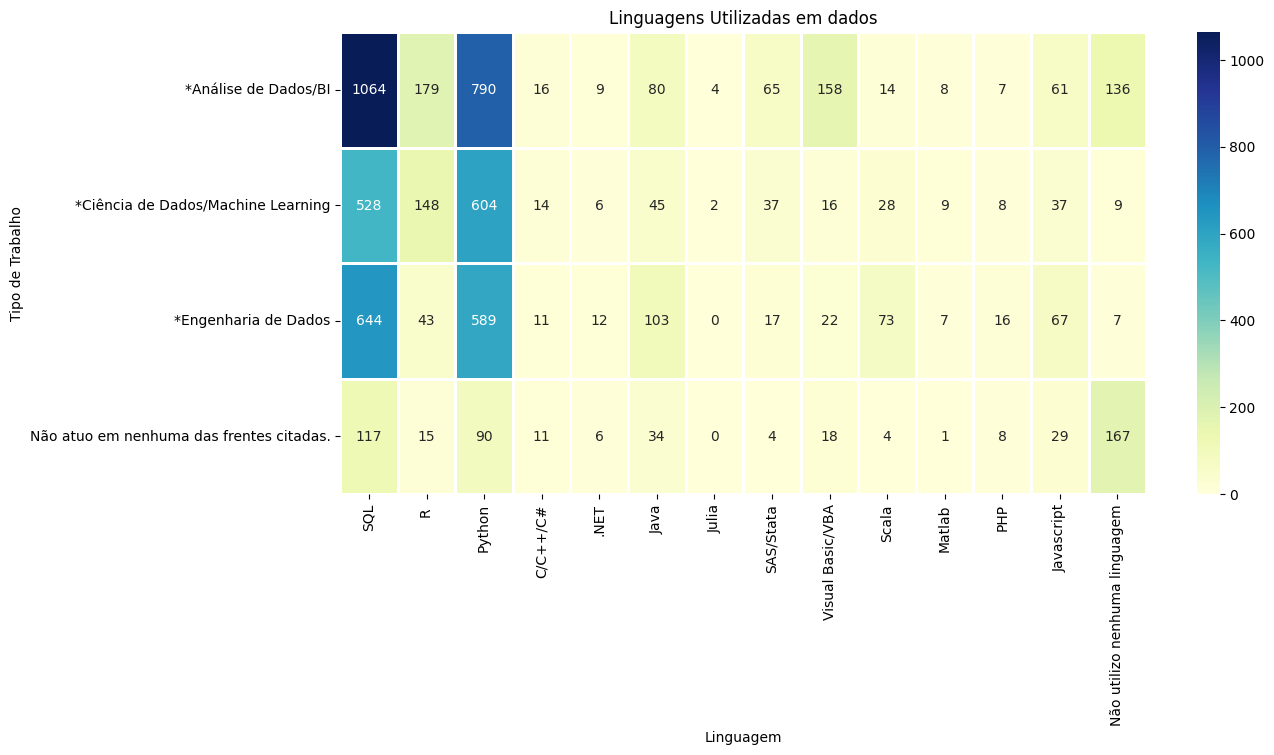

In [51]:
#Falta ajustar o tamanho das células no heatmap 

df_P4_d_pivot = df_P4_d.groupby('Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
).sum()


plt.figure(figsize=(13, 6))
heatmap = sns.heatmap(df_P4_d_pivot, cmap='YlGnBu', annot=True,linewidths=2,fmt='.0f')  # cmap define a paleta de cores

plt.title('Linguagens Utilizadas em dados')
plt.xlabel('Linguagem')
plt.ylabel('Tipo de Trabalho')
plt.show()

C:\Users\INTEL\AppData\Local\Temp\ipykernel_8420\1541550682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P8_a.rename(columns={i:extract_text_between_quotes(i)[1]},inplace=True)


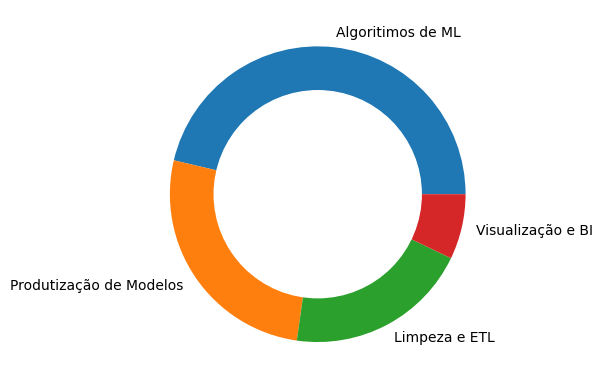

In [124]:
df_P8_a = parte_8.filter(like='P8_a_',axis=1)

for i in df_P8_a.columns:
    df_P8_a.rename(columns={i:extract_text_between_quotes(i)[1]},inplace=True)


df_P8_a_rename_dict = {'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.':'Algoritimos de ML',
'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.':'Limpeza e ETL',
'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.':'Produtização de Modelos',
'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).':'Algoritimos de ML',
'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento':'Produtização de Modelos',
'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário':'Algoritimos de ML',
'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc':'Visualização e BI',
'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.':'Algoritimos de ML',
'Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.':'Limpeza e ETL',
'Crio e gerencio soluções de Feature Store e cultura de MLOps.':'Produtização de Modelos',
'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)':'Produtização de Modelos',
'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.':'Produtização de Modelos',
'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.':'Algoritimos de ML'}

df_P8_a = df_P8_a.rename(columns=df_P8_a_rename_dict)

df_P8_a = df_P8_a.transpose().apply(lambda col: col.sum(), axis=1)

df_P8_a = df_P8_a.reset_index()
df_P8_a.columns = ['Desc', 'Soma']
df_P8_a = df_P8_a.sort_values('Soma',ascending=False)

df_P8_a_top = df_P8_a.groupby('Desc',as_index=False).sum().sort_values('Soma',ascending=False)

df_P8_a_top


#Donut Chart
plt_centro = plt.Circle((0,0), 0.7,color='white')
plt.pie(df_P8_a_top['Soma'],labels=df_P8_a_top['Desc'])
p = plt.gcf()
p.gca().add_artist(plt_centro)

plt.show()



Text(0, 0.5, 'Função')

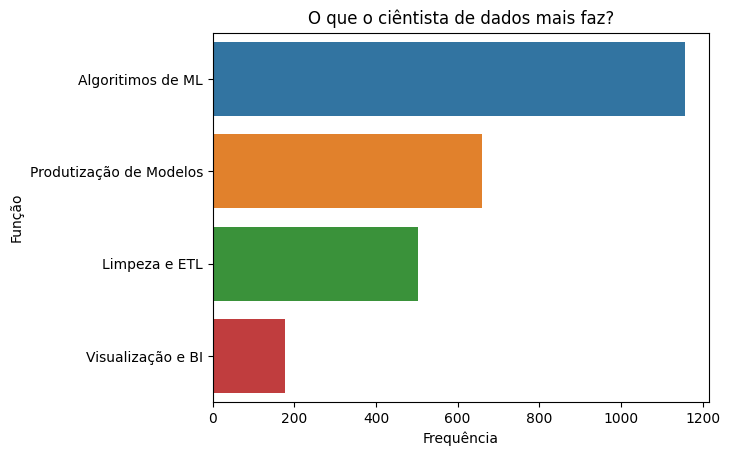

C:\Users\INTEL\AppData\Local\Temp\ipykernel_8420\3447739877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P8_b.rename(columns={i:extract_text_between_quotes(i)[1]},inplace=True)


Text(0, 0.5, 'Função')

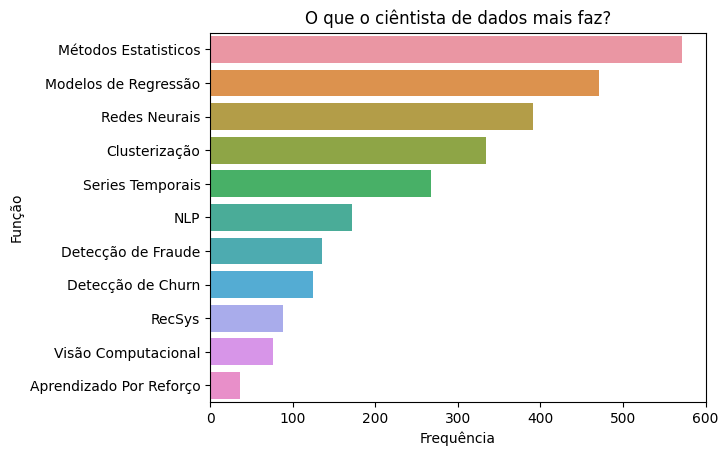

In [135]:
df_P8_b = parte_8.filter(like='P8_b_',axis=1)

for i in df_P8_b.columns:
    df_P8_b.rename(columns={i:extract_text_between_quotes(i)[1]},inplace=True)

df_P8_b_rename_dict = {'Utilizo modelos de regressão (linear, logística, GLM)':'Modelos de Regressão',
'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação':'Redes Neurais',
'Desenvolvo sistemas de recomendação (RecSys)':'RecSys',
'Utilizo métodos estatísticos Bayesianos para analisar dados':'Métodos Estatisticos',
'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados':'NLP',
'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados':'Métodos Estatisticos',
'Utilizo cadeias de Markov ou HMM':'Métodos Estatisticos',
'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)':'Clusterização',
'Realizo previsões através de modelos de Séries Temporais (Time Series)':'Series Temporais',
'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)':'Aprendizado Por Reforço',
'Utilizo modelos de Machine Learning para detecção de fraude':'Detecção de Fraude',
'Utilizo métodos de Visão Computacional':'Visão Computacional',
'Utilizo modelos de Detecção de Churn':'Detecção de Churn'}

df_P8_b = df_P8_b.rename(columns=df_P8_b_rename_dict)

df_P8_b = df_P8_b.transpose().apply(lambda col: col.sum(), axis=1)

df_P8_b = df_P8_b.reset_index()
df_P8_b.columns = ['Desc', 'Soma']
df_P8_b = df_P8_b.sort_values('Soma',ascending=False)

df_P8_b_top = df_P8_b.groupby('Desc',as_index=False).sum().sort_values('Soma',ascending=False)

df_P8_b_top

#Gráfico de barra
sns.barplot(df_P8_b_top,y='Desc',x='Soma')
plt.title('O que o ciêntista de dados mais faz?')
plt.xlabel('Frequência')
plt.ylabel('Função')

